In [39]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 6]

In [22]:
path = r'../output/amazon/' # use your path
all_files = [x for x in os.listdir(path) if x.endswith(".csv")]
li = []

for filename in all_files:
    df = pd.read_csv(path+filename, index_col=None, header=0)
    df["Brand"] = filename.split("_")[0]
    df["Line"] = filename.split("_")[1].split(".")[0]
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [29]:
df = df.drop(df.columns[0], axis=1)

In [30]:
df

,Product,Rating,Title,Review,Brand,Line
0,Carol’s Daughter Coco Creme Curl Quenching Dee...,VINE VOICE,1.0 out of 5 stars,Video Player is loading.Play VideoPlayMuteCurr...,Carol's Daughter,Masks and Treatments
1,Carol’s Daughter Coco Creme Curl Quenching Dee...,1.0 out of 5 stars,Not for me,"I have thick, wavy, coarse, frizzy hair and th...",Carol's Daughter,Masks and Treatments
2,Carol’s Daughter Coco Creme Curl Quenching Dee...,5.0 out of 5 stars,My new favorite!!,It's AMAZING!! It is so slippery that the tini...,Carol's Daughter,Masks and Treatments
3,Carol’s Daughter Coco Creme Curl Quenching Dee...,5.0 out of 5 stars,1 product Serious curl definition,Very great product for naturals the best I’ve ...,Carol's Daughter,Masks and Treatments
4,Carol’s Daughter Coco Creme Curl Quenching Dee...,5.0 out of 5 stars,It worked! I have bouncy curls now!,I never thought I could just let my curls air ...,Carol's Daughter,Masks and Treatments
...,...,...,...,...,...,...
56349,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,Like sand & silk: perfect soak,I ordered this and another scent based on the ...,SheaMoisture,Coconut and Hibiscus
56350,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,Great Product!,I got this as a gift for my Bachelorette Party...,SheaMoisture,Coconut and Hibiscus
56351,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,4.0 out of 5 stars,Four Stars,Lovely fragrance!,SheaMoisture,Coconut and Hibiscus
56352,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,Verified Purchase,Report abuse,The product arrived on time and as advertised....,SheaMoisture,Coconut and Hibiscus


In [34]:
df = df[df.Rating.str.contains("stars")]
df["RatingNumeric"]  = df.Rating.str.split(expand=True)[0]
df["Title"] = df["Title"].str.lower()
df["Review"] = df["Review"].str.lower()

<ipython-input-34-3d6003429c89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["RatingNumeric"]  = df.Rating.str.split(expand=True)[0]
<ipython-input-34-3d6003429c89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Title"] = df["Title"].str.lower()
<ipython-input-34-3d6003429c89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [35]:
df

,Product,Rating,Title,Review,Brand,Line,RatingNumeric
1,Carol’s Daughter Coco Creme Curl Quenching Dee...,1.0 out of 5 stars,not for me,"i have thick, wavy, coarse, frizzy hair and th...",Carol's Daughter,Masks and Treatments,1.0
2,Carol’s Daughter Coco Creme Curl Quenching Dee...,5.0 out of 5 stars,my new favorite!!,it's amazing!! it is so slippery that the tini...,Carol's Daughter,Masks and Treatments,5.0
3,Carol’s Daughter Coco Creme Curl Quenching Dee...,5.0 out of 5 stars,1 product serious curl definition,very great product for naturals the best i’ve ...,Carol's Daughter,Masks and Treatments,5.0
4,Carol’s Daughter Coco Creme Curl Quenching Dee...,5.0 out of 5 stars,it worked! i have bouncy curls now!,i never thought i could just let my curls air ...,Carol's Daughter,Masks and Treatments,5.0
5,Carol’s Daughter Coco Creme Curl Quenching Dee...,1.0 out of 5 stars,zero stars - worst. smell. ever. and no way to...,i shampooed my hair six times with anothe prod...,Carol's Daughter,Masks and Treatments,1.0
...,...,...,...,...,...,...,...
56347,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,very nice relaxing product,arrived on time. very nice relaxing product.,SheaMoisture,Coconut and Hibiscus,5.0
56348,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,five stars,"wonderful product, love it!",SheaMoisture,Coconut and Hibiscus,5.0
56349,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,like sand & silk: perfect soak,i ordered this and another scent based on the ...,SheaMoisture,Coconut and Hibiscus,5.0
56350,Shea Moisture Coconut & Hibiscus Dead Sea Salt...,5.0 out of 5 stars,great product!,i got this as a gift for my bachelorette party...,SheaMoisture,Coconut and Hibiscus,5.0


In [59]:
brands = list(df.Brand.unique())
brands

["Carol's Daughter",
 'SheaMoisture',
 "Not Your Mother's",
 'Moptop',
 "Uncle Funky's Daughter",
 'Giovanni',
 'Pacifica',
 'Cake Beauty',
 'TRESemme',
 'Curls']

In [74]:
brand_counts = df.Brand.value_counts()
brand_counts

Carol's Daughter          18694
SheaMoisture              12437
Moptop                     8545
Giovanni                   3447
Pacifica                   2820
Curls                      1992
Cake Beauty                1739
Not Your Mother's          1081
TRESemme                    580
Uncle Funky's Daughter      229
Name: Brand, dtype: int64

In [120]:
def plot_rating_keyword(keyword):
    filtered_df = df[(df.Title.str.contains(keyword) | (df.Review.str.contains(keyword)))]

    cts = filtered_df[['Brand','RatingNumeric']].value_counts()
    brand_cts = filtered_df.Brand.value_counts()

    star1 = [cts[b,'1.0']/brand_cts[b] if any(cts.index.isin([(b,'1.0')])) else 0 for b in brands]
    star2 = [cts[b,'2.0']/brand_cts[b] if any(cts.index.isin([(b,'2.0')])) else 0 for b in brands]
    star3 = [cts[b,'3.0']/brand_cts[b] if any(cts.index.isin([(b,'3.0')])) else 0 for b in brands]
    star4 = [cts[b,'4.0']/brand_cts[b] if any(cts.index.isin([(b,'4.0')])) else 0 for b in brands]
    star5 = [cts[b,'5.0']/brand_cts[b] if any(cts.index.isin([(b,'5.0')])) else 0 for b in brands]

    x = pd.DataFrame([star1,star2,star3,star4,star5], columns=brands).transpose()
    x.columns = ['1.0','2.0','3.0', '4.0', '5.0']
    x.plot(kind='bar', stacked=True,
            title='Ratings by keyword: ' + keyword)


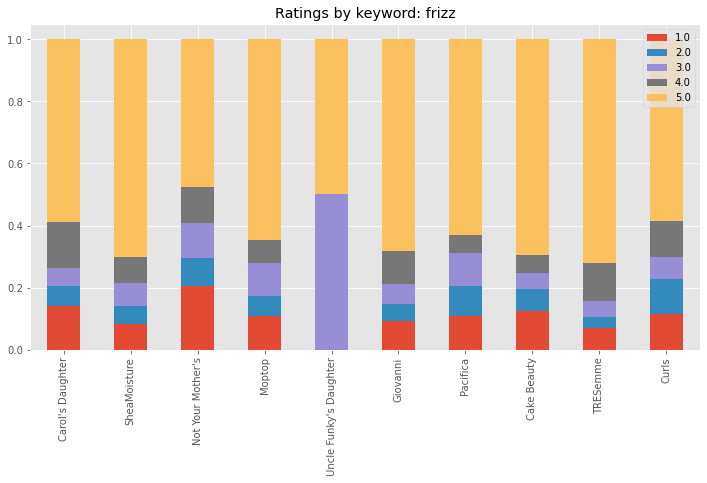

In [121]:
plot_rating_keyword("frizz")

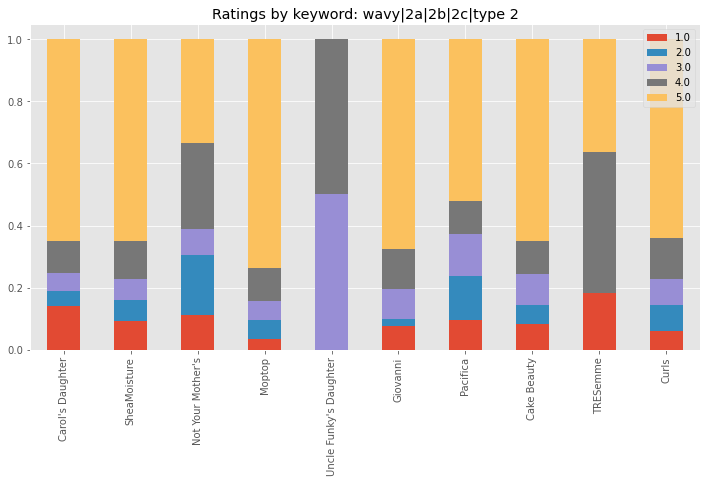

In [122]:
plot_rating_keyword("wavy|2a|2b|2c|type 2")

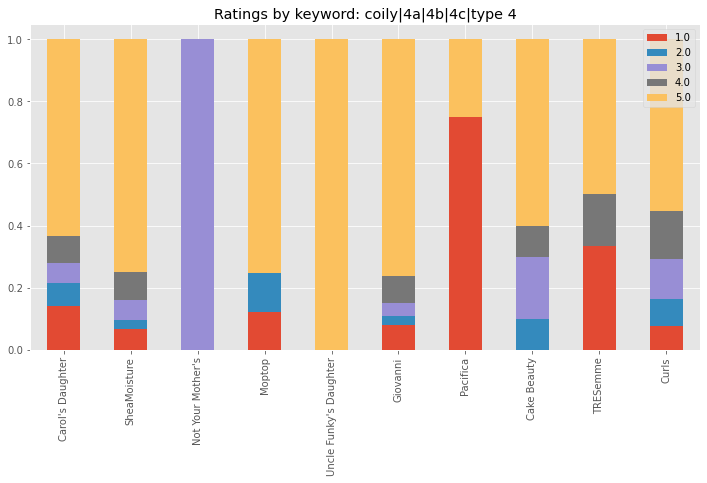

In [123]:
plot_rating_keyword("coily|4a|4b|4c|type 4")

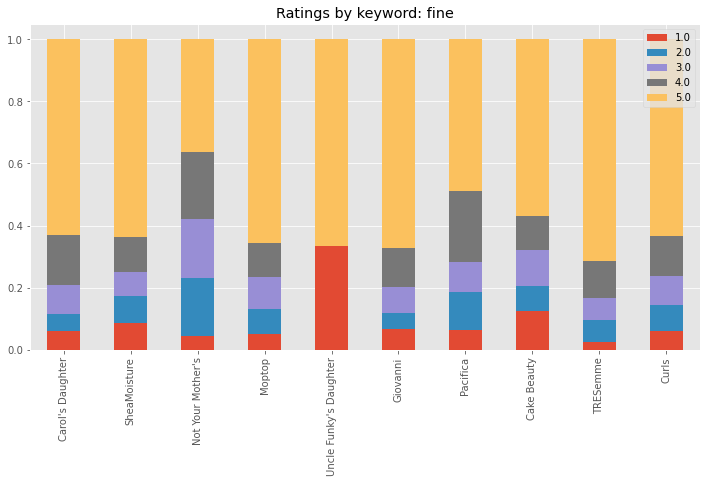

In [124]:
plot_rating_keyword("fine")

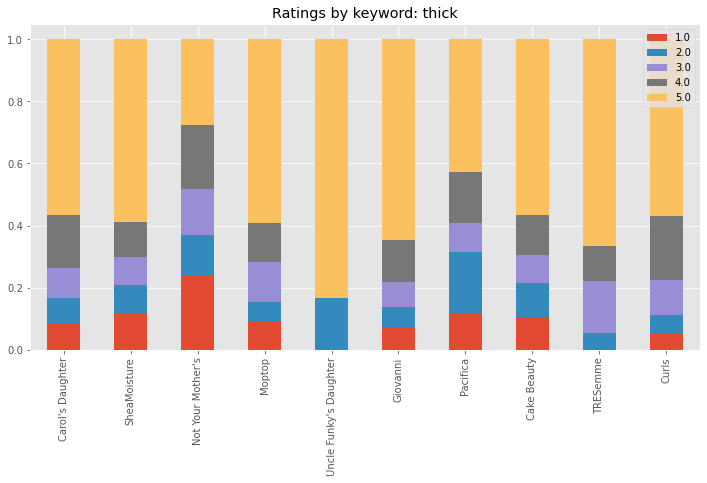

In [125]:
plot_rating_keyword("thick")